In [1]:
import pyvista as pv

In [40]:
mesh = pv.read('test1.vtk')
stl = pv.read('clite1_cm+TCP_C-Model+UpdatedTopShield.stl')

In [41]:
mesh.array_names

['Error']

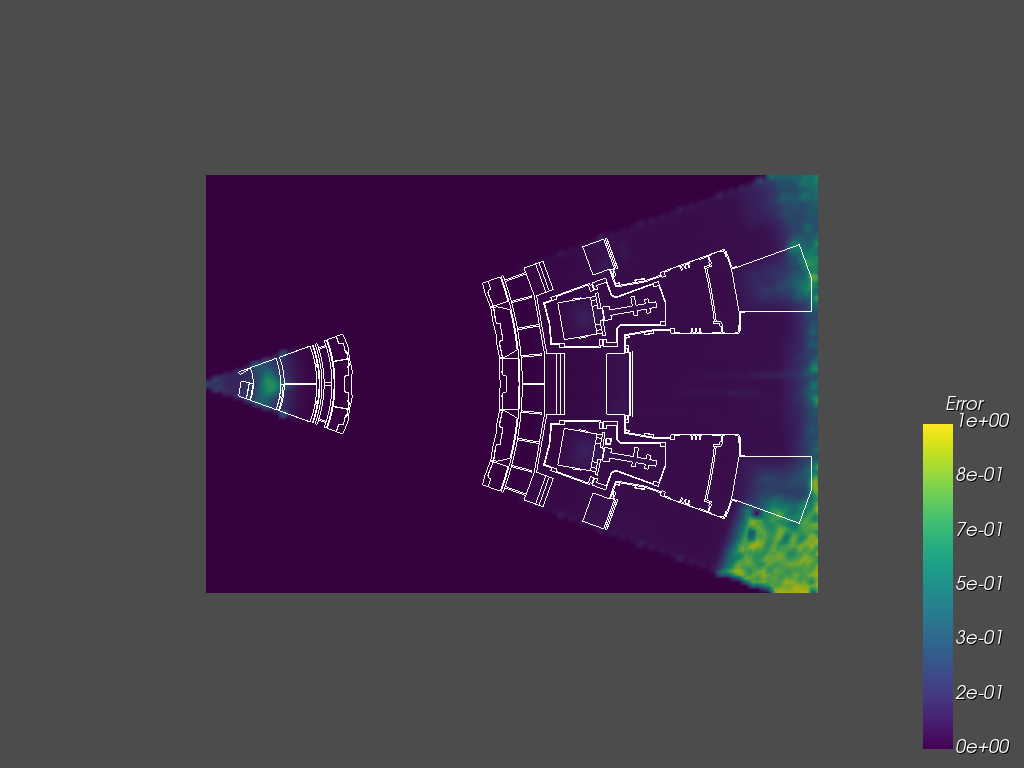

In [45]:
sargs = dict(
    title_font_size=18,
    label_font_size=18,
    shadow=True,
    n_labels=7,
    italic=True,
    fmt="%.e",
    font_family="arial",
    vertical=True)

plotter = pv.Plotter()
to_plot = mesh.slice_along_axis(5, axis='z')
idx = 2
stl_slice = stl.slice(normal='z', origin=to_plot[idx].center)
plotter.add_mesh(to_plot[idx], scalars = 'Error', scalar_bar_args=sargs)
plotter.add_mesh(stl_slice)

plotter.camera_position = 'xy'
plotter.show(jupyter_backend='static')

# mesh.plot(jupyter_backend='static')

In [42]:
to_plot = mesh.slice_along_axis(5, axis='z')
slicing1 = to_plot[0]
slicing1.center

[850.0, 0.0, -1280.0]

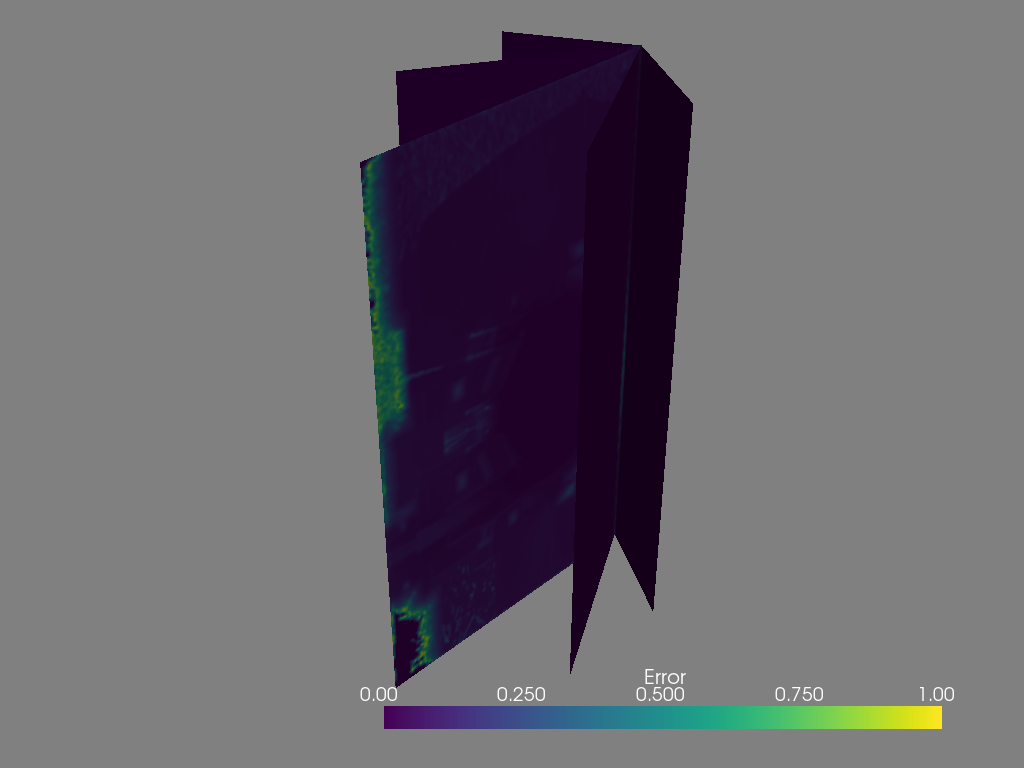

In [61]:
import numpy as np

# ranges = np.array(mesh.bounds).reshape(-1, 2).ptp(axis=1)
point = np.array([0, 0, 0])# np.array(mesh.center)


increment = np.pi / 6.0
# use a container to hold all the slices
slices = pv.MultiBlock()  # treat like a dictionary/list
for theta in np.arange(0, np.pi, increment):
    normal = np.array([np.cos(theta), np.sin(theta), 0.0]).dot(np.pi / 2.0)
    name = f'Bearing: {np.rad2deg(theta):.2f}'
    slices[name] = mesh.slice(origin=point, normal=normal)

p = pv.Plotter()
p.set_background('black')
camera_position = 'xy'
p.add_mesh(slices, scalars= 'Error')
p.show(jupyter_backend='static')


In [59]:
from f4enix.output.plotter import Atlas

mesh = pv.read('test1.vtk')
stl = pv.read('clite1_cm+TCP_C-Model+UpdatedTopShield.stl')

atlas = Atlas(mesh, stl)
mesh_slices, stl_slices = atlas.slice_toroidal(20)

p = pv.Plotter()
camera_position = 'xy'
for mesh_slice, stl_slice in (mesh_slices, stl_slices):
    p.add_mesh(mesh_slice, scalars= 'Error')
    p.add_mesh(stl_slice)

p.show(jupyter_backend='static')


AttributeError: 'RectilinearGrid' object has no attribute 'mesh'